### Data loading

In [1]:
import numpy as np
import pandas as pd

In [2]:
fake_news_filepath = "Fake.csv"
real_news_filepath = "True.csv"

fake_news_df = pd.read_csv(fake_news_filepath)
real_news_df = pd.read_csv(real_news_filepath)

Let's see the Fake news

In [3]:
fake_news_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
fake_news_df.describe(include='all')

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


Let's see the Real news

In [5]:
real_news_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
real_news_df.describe(include='all')

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


We want to build a binary classifier model; then, add the label to each dataset: "Real" and "Fake"

In [7]:
fake_news_df["Label"] = "Fake"
real_news_df["Label"] = "Real"

news_df = pd.concat([fake_news_df, real_news_df], ignore_index=True)

news_df.info(), news_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


(None,
                                                     title   text  \
 count                                               44898  44898   
 unique                                              38729  38646   
 top     Factbox: Trump fills top jobs for his administ...          
 freq                                                   14    627   
 
              subject                date  Label  
 count          44898               44898  44898  
 unique             8                2397      2  
 top     politicsNews  December 20, 2017    Fake  
 freq           11272                 182  23481  )

The size of the Dataset is 44898

In [8]:
news_df.sample(10).head(10)

,title,text,subject,date,Label
41952,Australia to fit warships with anti-missile de...,SYDNEY (Reuters) - Australian Prime Minister M...,worldnews,"October 2, 2017",Real
27837,Russia's foreign minister discussed Syria with...,MOSCOW (Reuters) - Russia’s Foreign Ministry s...,politicsNews,"April 7, 2017",Real
38441,"Militants cross from Afghanistan, kill two Pak...",ISLAMABAD (Reuters) - Militants have crossed i...,worldnews,"November 13, 2017",Real
29661,"On Inauguration Eve, Trumpsters party in the '...",WASHINGTON (Reuters) - They voted to “drain th...,politicsNews,"January 20, 2017",Real
4533,CNN Commentator DEVASTATES Trump Supporter Wh...,"This should come as no surprise to most of us,...",News,"September 21, 2016",Fake
44715,"Japan's Abe, UK May pledge cooperation on Nort...",TOKYO (Reuters) - The leaders of Japan and Bri...,worldnews,"August 31, 2017",Real
7432,Colbert Says Goodbye To Rubio In Epic Sendoff...,"Marco Rubio, the latest victim of the Trump tr...",News,"March 18, 2016",Fake
15865,SHOCKING: Why Our Fed Government Will Grant “D...,"If we didn t know better, we d almost believe ...",politics,"Apr 7, 2015",Fake
33073,Trump draws even with Clinton in national Whit...,WASHINGTON (Reuters) - Republican Donald Trump...,politicsNews,"May 11, 2016",Real
2143,Former Virginia Mayor Could Get 40 Years Afte...,The former mayor of Fairfax City in Virginia i...,News,"March 14, 2017",Fake


### Exploratory Data Analysis (EDA)

Check for imbalanced data between Fake and Real news

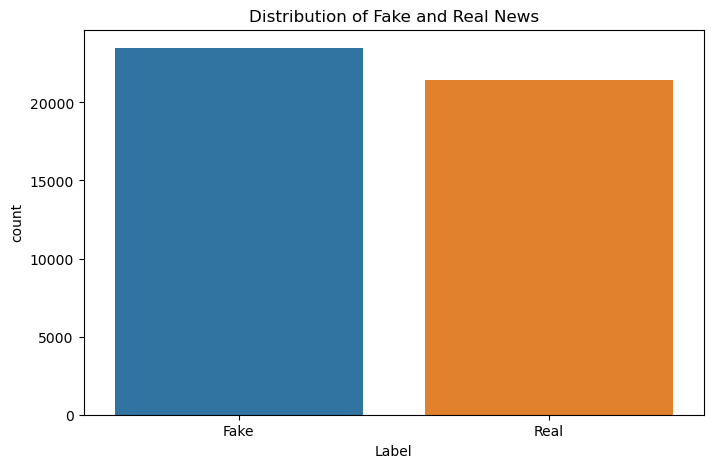

Label
Fake    23481
Real    21417
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=news_df, x='Label')
plt.title('Distribution of Fake and Real News')
plt.show()

# Count the number of Fake and Real news
news_df['Label'].value_counts()


Let's examine the distribution of "subjects" within the dataset to determine whether we should consider this feature or exclude it

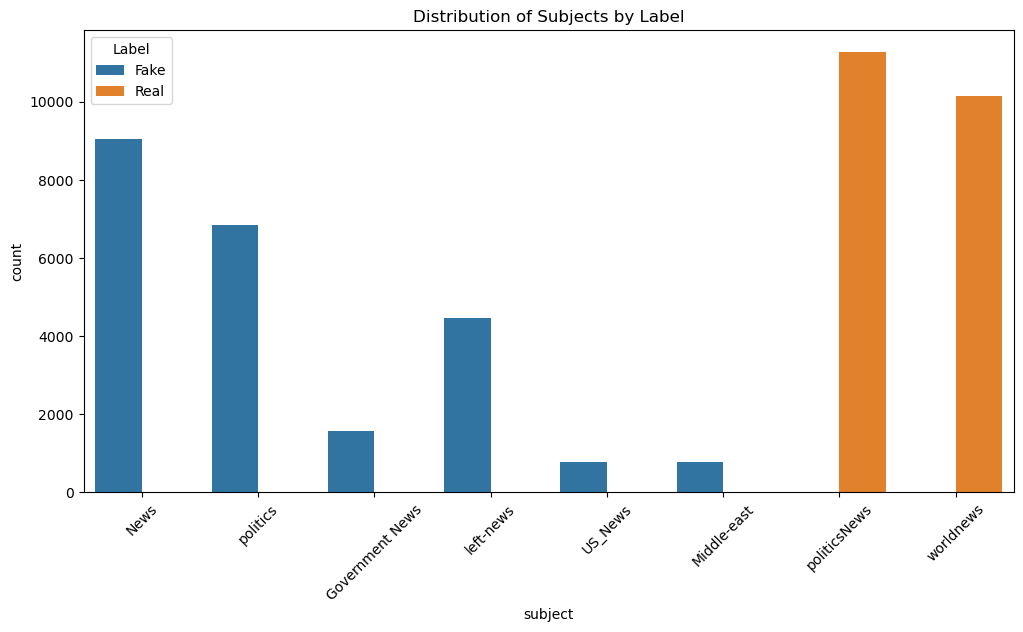

,Label,subject,count
0,Fake,Government News,1570
1,Fake,Middle-east,778
2,Fake,News,9050
3,Fake,US_News,783
4,Fake,left-news,4459
5,Fake,politics,6841
6,Real,politicsNews,11272
7,Real,worldnews,10145


In [10]:
# Examine the distribution of subjects
plt.figure(figsize=(12, 6))
sns.countplot(data=news_df, x='subject', hue='Label')
plt.title('Distribution of Subjects by Label')
plt.xticks(rotation=45)
plt.show()

# Count the distribution of subjects within Fake and Real news
news_df.groupby(['Label', 'subject']).size().reset_index(name='count')


The subject categories are quite different between Fake and True news:

- Fake news has a variety of subjects: "Government News", "Middle-east", "News", "US_News", "left-news", and "politics".
- True news only falls under two subjects: "politicsNews" and "worldnews".

Given this discrepancy in subject categories, including "subject" as a feature might introduce bias into the model

Let's move on to examining anomalies in the "date" column, such as text and links that don't conform to date formats

In [11]:
list(filter(lambda x: len(x)>20, news_df.date.unique()))

['https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/',
 'https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/',
 'https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/',
 'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg',
 'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg',
 'MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video]']

The issues could be related to the inconsistency in date formats or the presence of non-date text. We need to Standardize the date formats for valid date entries and remove those rows that cannot be converted to a valid date


In [12]:
news_df = news_df[news_df.date.map(lambda x: len(x)) <= 20]
news_df.date = pd.to_datetime(news_df.date, format="mixed")
news_df.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,Fake


Next, let's proceed with the time-based analyses:

- Observe patterns in data collection over time for Fake and Real news.
- Analyze the type of "subject" news across time.

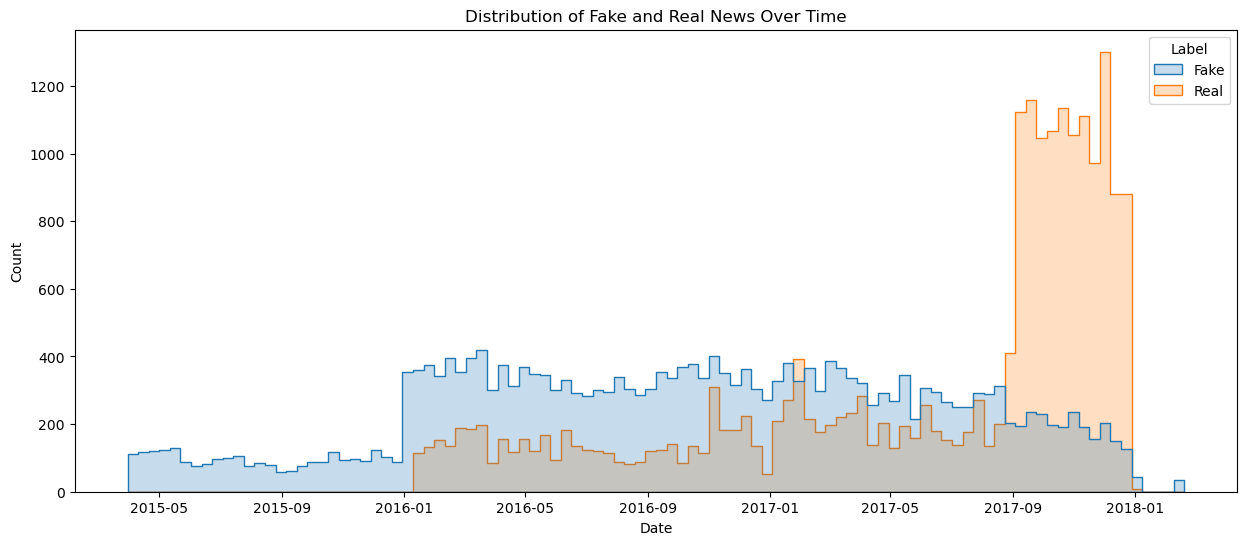

In [16]:
# Sort the dataframe by the standardized date
news_df = news_df.sort_values('date')

# Observe patterns in data collection over time for Fake and Real news
plt.figure(figsize=(15, 6))
sns.histplot(data=news_df, x='date', hue='Label', element='step', stat='count', common_norm=False, bins=100)
plt.title('Distribution of Fake and Real News Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


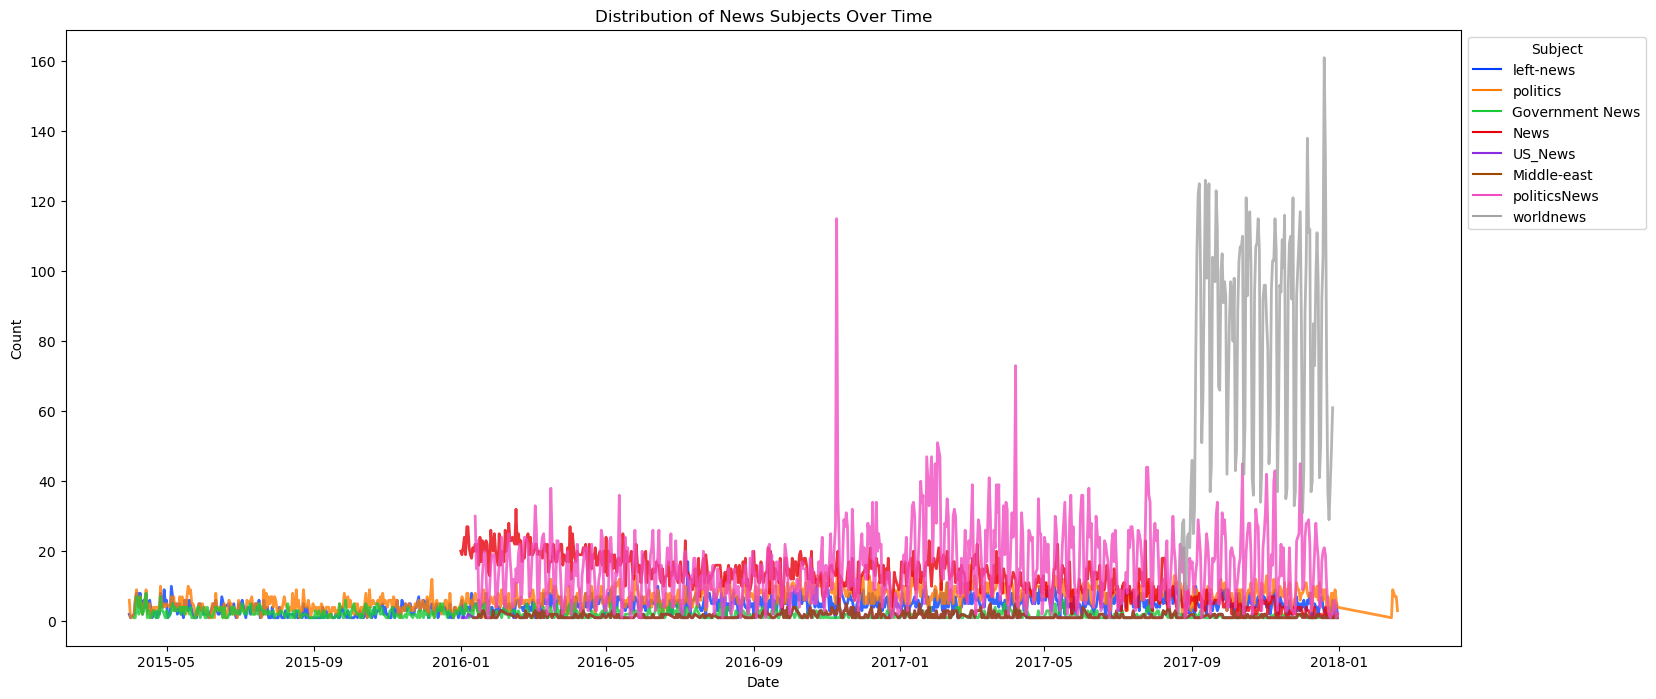

In [26]:
# Analyze the type of subject news across time

# Aggregate the data
agg_data = news_df.groupby(['date', 'subject']).size().reset_index(name='count')


plt.figure(figsize=(18, 8))
sns.lineplot(data=agg_data, x='date', y='count', hue='subject', estimator=None, units='subject', lw=2, alpha=0.8, palette='bright')
plt.title('Distribution of News Subjects Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Subject', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Using Hue order to sort the legend

- "politicsNews" and "worldnews" (which are the subjects for Real news) have a consistent presence over time, especially from mid-2016 onwards.
- For Fake news, the subjects like "News", "politics", and "Government News" also show a consistent presence in the dataset, with some minor fluctuations.

Check for missing values in the 'text' column

In [28]:
missing_text_count = news_df['text'].isnull().sum()
missing_text_count

0

The most important feature is the one related with the content of the new:"text" because is the way we can determine if a new is fake or not

### PreProcessing

In [30]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/omargonzales/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/omargonzales/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import pandas as pd

# Function to perform all preprocessing steps on a single text document
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Convert to Lowercase
    tokens = [word.lower() for word in tokens]
    
    # Remove Punctuations
    tokens = [word for word in tokens if word.isalnum()]
    
    # Remove Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Reconstruct the preprocessed text
    return ' '.join(tokens)

# Apply text preprocessing on the 'text' column
news_df['preprocessed_text'] = news_df['text'].apply(preprocess_text)

In [33]:
news_df[['text', 'preprocessed_text']].head()

,text,preprocessed_text
15885,Just making room for Hillary President Obama t...,making room hillary president obama today anno...
15890,The irony here isn t lost on us. Hillary is be...,irony lost us hillary compared president wante...
15889,Does anyone really think Hillary Clinton will ...,anyone really think hillary clinton come clean...
15888,Nothing like political cronyism to make your s...,nothing like political cronyism make stomach c...
15887,"In case you missed it Sen. Harry Reid (R-NV), ...",case missed harry reid announced last week ret...


In [34]:
# Save the preprocessed data
news_df.to_csv('news_preprocessed.csv', index=False)